In [ ]:
# xml 파싱
import xml.etree.ElementTree as ET
import os
# 이미지 블러처리
from PIL import Image

In [ ]:
dataFile_p = '/content/drive/MyDrive/불량판정 프로젝트/2번 카메라 데이터/사진'
dataFile_t = '/content/drive/MyDrive/불량판정 프로젝트/2번 카메라 데이터/설명'   

class0File = ''   
class1File = ''
class2File = ''
class3File = ''

In [ ]:
dataFiles_t = os.listdir(dataFile_t)
p_code = '.jpg'
for s in dataFiles_t:
  p = s.split('.')[0] + p_code
  print(p)
  if p == '.jpg':
    continue
  xmlname = dataFile_t + '/' + s
  imgname = dataFile_p + '/' + p
  img = Image.open(imgname)
  img_resize = img.resize((224, 224))
  tree = ET.parse(xmlname)
  root=tree.getroot()
  tag_list = []
  for i in root:
    tag_list.append(i.tag)
  if len(tag_list) == 6:
    img_resize.save(class0File+ '/' + p)
  elif len(tag_list) == 7:
    class_num = int(tree.find("object")[0].text)
    if class_num == 1:
      img_resize.save(class1File+ '/' + p)
    elif class_num == 2:
      img_resize.save(class2File+ '/' + p)
    elif class_num == 3:
      img_resize.save(class3File+ '/' + p)

0127_13.jpg
0127_4.jpg
0127_12.jpg
0127_11.jpg
0127_1.jpg
0127_10.jpg
0127_8.jpg
0127_16.jpg
0127_14.jpg
0127_5.jpg
0127_15.jpg
0127_6.jpg
0127_7.jpg
0127_3.jpg
0127_9.jpg
0127_2.jpg
0127_18.jpg
0127_20.jpg
0127_17.jpg
0127_19.jpg
0203_3.jpg
0127_21.jpg
0203_1.jpg
0127_22.jpg
0127_23.jpg
0203_2.jpg
0127_24.jpg
0203_4.jpg
0203_5.jpg
0203_7.jpg
0203_10.jpg
2022_0210_1.jpg
0203_6.jpg
0203_11.jpg
0203_8.jpg
0203_15.jpg
0203_9.jpg
0203_14.jpg
2022_0210_5.jpg
2022_0210_2.jpg
0203_12.jpg
0203_13.jpg
2022_0210_6.jpg
2022_0210_3.jpg
2022_0210_4.jpg
2022_0210_9.jpg
2022_0210_8.jpg
2022_0210_7.jpg
2022_0210_10.jpg
2022_0210_11.jpg
2022_0210_14.jpg
2022_0210_15.jpg
2022_0210_16.jpg
2022_0210_17.jpg
2022_0210_12.jpg
2022_0210_20.jpg
2022_0210_13.jpg
2022_0210_21.jpg
2022_0210_28.jpg
2022_0210_26.jpg
2022_0210_19.jpg
2022_0210_18.jpg
2022_0210_22.jpg
2022_0210_23.jpg
2022_0210_24.jpg
2022_0210_25.jpg
2022_0210_29.jpg
2022_0210_30.jpg
2022_0210_37.jpg
2022_0210_27.jpg
2022_0210_32.jpg
2022_0210_33.jp

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.applications import vgg16
from keras.applications import vgg19
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.applications import ResNet101

In [ ]:
num_classes = 5
image_size = 224

In [ ]:
data_generator=ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
trainDir = '/content/drive/MyDrive/불량판정 프로젝트/2번 카메라 데이터/불량분류 전처리'
train_set = data_generator.flow_from_directory(
    trainDir,
    target_size=(image_size, image_size),
    batch_size=300,
    class_mode='categorical'
    )

Found 406 images belonging to 5 classes.


In [ ]:
x_train, y_train = next(train_set)
len(x_train)

300

In [ ]:
testDir = '/content/drive/MyDrive/불량판정 프로젝트/2번 카메라 데이터/테스트 데이터'
test_set = data_generator.flow_from_directory(
    testDir,
    target_size=(image_size, image_size),
    batch_size=30,
    class_mode='categorical'
    )

Found 120 images belonging to 5 classes.


In [ ]:
x_test, y_test = next(test_set)
len(x_test)

30

In [ ]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (300, 224, 224, 3)
y_train (300, 5)
x_test (30, 224, 224, 3)
y_test (30, 5)


In [ ]:
pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = Sequential()
model.add(vgg16.VGG16(include_top=False, pooling='avg', weights='imagenet',))

In [ ]:
model.add(Dense(num_classes,activation='softmax'))
model.layers[0].layers

In [ ]:
# 전처리 x , 증강 x (원본사진 vgg16)
model.compile(loss='categorical_crossentropy',
            optimizer = Adam(lr=0.001),
            metrics=['accuracy'])
hist=model.fit(x_train, y_train, batch_size=50, epochs=10, validation_split=0.3)

Epoch 1/10
5/5 [==============================] - 292s 57s/step - loss: 116.2785 - accuracy: 0.2476 - val_loss: 2.7966 - val_accuracy: 0.2444
Epoch 2/10
5/5 [==============================] - 287s 57s/step - loss: 2.7877 - accuracy: 0.2857 - val_loss: 1.7828 - val_accuracy: 0.2444
Epoch 3/10
5/5 [==============================] - 297s 59s/step - loss: 1.7261 - accuracy: 0.3000 - val_loss: 1.4741 - val_accuracy: 0.2556
Epoch 4/10
5/5 [==============================] - 306s 59s/step - loss: 1.5764 - accuracy: 0.2667 - val_loss: 1.3818 - val_accuracy: 0.5444
Epoch 5/10
5/5 [==============================] - 296s 58s/step - loss: 1.4437 - accuracy: 0.3190 - val_loss: 1.3492 - val_accuracy: 0.4444
Epoch 6/10
5/5 [==============================] - 287s 57s/step - loss: 1.3957 - accuracy: 0.3238 - val_loss: 1.3403 - val_accuracy: 0.2222
Epoch 7/10
5/5 [==============================] - 291s 57s/step - loss: 1.3695 - accuracy: 0.2571 - val_loss: 1.3118 - val_accuracy: 0.4222
Epoch 8/10
5/5 [==

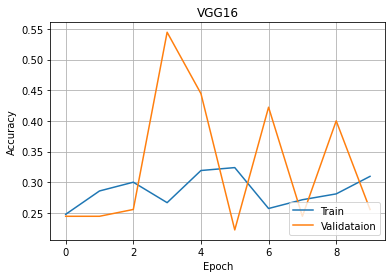

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('VGG16')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validataion'], loc = 'lower right')
plt.grid()
plt.show()

In [ ]:
model5 = Sequential()
model5.add(vgg19.VGG19(include_top=False, pooling='avg', weights='imagenet',))

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
model5.add(Dense(num_classes,activation='softmax'))
model5.layers[0].layers

In [ ]:
# 전처리 x , 증강 x (원본사진 vgg19)
model5.compile(loss='categorical_crossentropy',
            optimizer = Adam(lr=0.001),
            metrics=['accuracy'])
hist1=model5.fit(x_train, y_train, batch_size=50, epochs=10, validation_split=0.3)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
5/5 [==============================] - 490s 94s/step - loss: 497.5752 - accuracy: 0.2143 - val_loss: 24.2340 - val_accuracy: 0.3000
Epoch 2/10
5/5 [==============================] - 482s 95s/step - loss: 6.8088 - accuracy: 0.3143 - val_loss: 1.4633 - val_accuracy: 0.2667
Epoch 3/10
5/5 [==============================] - 480s 94s/step - loss: 1.4675 - accuracy: 0.2905 - val_loss: 1.7824 - val_accuracy: 0.2667
Epoch 4/10
5/5 [==============================] - 493s 96s/step - loss: 1.5819 - accuracy: 0.3000 - val_loss: 1.3030 - val_accuracy: 0.3111
Epoch 5/10
5/5 [==============================] - 483s 95s/step - loss: 1.4500 - accuracy: 0.2810 - val_loss: 1.4329 - val_accuracy: 0.2667
Epoch 6/10
5/5 [==============================] - 487s 96s/step - loss: 1.3968 - accuracy: 0.3333 - val_loss: 1.3542 - val_accuracy: 0.3111
Epoch 7/10
5/5 [==============================] - 496s 98s/step - loss: 1.3682 - accuracy: 0.2905 - val_loss: 1.3362 - val_accuracy: 0.2667
Epoch 8/10
5/5 [=

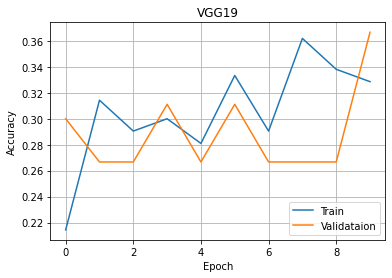

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('VGG19')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validataion'], loc = 'lower right')
plt.grid()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
# ResNet50 모델 선언
model1 = ResNet50(include_top=True, weights=None, input_shape=(224, 224, 3), pooling=max, classes=5) # 클래스는 맞춰서 변경요망

In [ ]:
# ResNet 모델 학습 및 구현
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
hist2 = model1.fit(x_train,y_train,batch_size=50, epochs=10, validation_split=(0.3))

Epoch 1/10
5/5 [==============================] - 163s 30s/step - loss: 4.7396 - accuracy: 0.3667 - val_loss: 47.6434 - val_accuracy: 0.3000
Epoch 2/10
5/5 [==============================] - 167s 32s/step - loss: 1.5967 - accuracy: 0.4905 - val_loss: 163.9858 - val_accuracy: 0.2667
Epoch 3/10
5/5 [==============================] - 150s 29s/step - loss: 1.2786 - accuracy: 0.5952 - val_loss: 376.4236 - val_accuracy: 0.2667
Epoch 4/10
5/5 [==============================] - 149s 29s/step - loss: 0.7444 - accuracy: 0.7238 - val_loss: 401.2084 - val_accuracy: 0.2667
Epoch 5/10
5/5 [==============================] - 149s 29s/step - loss: 0.6561 - accuracy: 0.8048 - val_loss: 250.6077 - val_accuracy: 0.2667
Epoch 6/10
5/5 [==============================] - 150s 29s/step - loss: 0.6624 - accuracy: 0.7714 - val_loss: 147.7064 - val_accuracy: 0.3556
Epoch 7/10
5/5 [==============================] - 150s 29s/step - loss: 0.3565 - accuracy: 0.8667 - val_loss: 82.4227 - val_accuracy: 0.2667
Epoch 8/

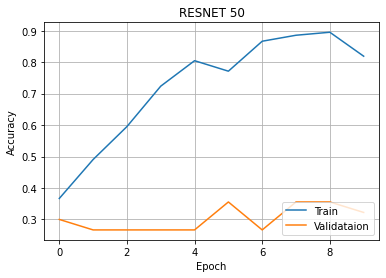

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('RESNET 50')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validataion'], loc = 'lower right')
plt.grid()
plt.show()

In [ ]:
# resnet101
model2 = ResNet101(include_top=True, weights=None, input_shape=(224, 224, 3), pooling=max, classes=5) # 클래스는 맞춰서 변경요망

In [ ]:
# ResNet 101 모델 학습 및 구현
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
hist3 = model2.fit(x_train,y_train,batch_size=50, epochs=10, validation_split=(0.3))

Epoch 1/10


In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('RESNET 101')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validataion'], loc = 'lower right')
plt.grid()
plt.show()